In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
Nclass = 500 # 500 samples per class
D = 2 # dimensions
M = 3 # Number of Hidden layers
K = 3 # number of classes

# 3 gaussian clouds
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

# create labels
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
# Indicator matrix
T = np.zeros((N,K))
for i in range(N):
    T[i, Y[i]] = 1

In [3]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid( tf.matmul(X,W1)+b1 )
    return tf.matmul(Z,W2)+b2

In [5]:
tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

# Create symbolic variables
W1 = init_weights([D, M])
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

logits = forward(tfX, W1, b1, W2, b2)

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=tfY, logits=logits))

train_op = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
predict_op = tf.argmax(logits, 1)

Accuracy: 0.333333333333
Accuracy: 0.333333333333
Accuracy: 0.56
Accuracy: 0.644666666667
Accuracy: 0.662666666667
Accuracy: 0.772
Accuracy: 0.879333333333
Accuracy: 0.940666666667
Accuracy: 0.962
Accuracy: 0.966666666667
Accuracy: 0.966666666667
Accuracy: 0.966
Accuracy: 0.966
Accuracy: 0.964666666667
Accuracy: 0.964666666667
Accuracy: 0.965333333333
Accuracy: 0.965333333333
Accuracy: 0.966666666667
Accuracy: 0.966666666667
Accuracy: 0.966


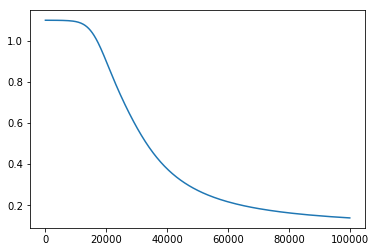

In [7]:
costs = []

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    
    for i in range(100000):
        session.run(train_op, feed_dict={tfX: X, tfY: T})
        
        c = session.run(cost, feed_dict={tfX: X, tfY: T})
        pred = session.run(predict_op, feed_dict={tfX: X, tfY:T})
            
        costs.append(c)
        if i%5000==0:
            print("Accuracy:", np.mean(Y == pred))
    
    plt.plot(costs)
    plt.show();

Accuracy: 0.333333333333
Accuracy: 0.986
Accuracy: 0.986666666667
Accuracy: 0.990666666667
Accuracy: 0.991333333333
Accuracy: 0.988
Accuracy: 0.988666666667
Accuracy: 0.992666666667
Accuracy: 0.990666666667
Accuracy: 0.992666666667
Accuracy: 0.993333333333
Accuracy: 0.988
Accuracy: 0.994
Accuracy: 0.995333333333
Accuracy: 0.995333333333
Accuracy: 0.994666666667
Accuracy: 0.996666666667
Accuracy: 0.995333333333
Accuracy: 0.996
Accuracy: 0.996


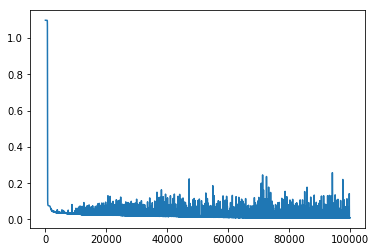

In [9]:
M1 = 30 # Number of Hidden layers
M2 = 10

def forward(X, W1, b1, W2, b2, W3, b3):
    Z1 = tf.nn.relu( tf.matmul(X, W1) + b1 )                                    
    Z2 = tf.nn.relu( tf.matmul(Z1, W2) + b2 )                                   
    return tf.matmul(Z2, W3) + b3 


tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

# Create symbolic variables
W1 = init_weights([D, M1])
b1 = init_weights([M1])
W2 = init_weights([M1, M2])
b2 = init_weights([M2])
W3 = init_weights([M2, K])
b3 = init_weights([K])

logits = forward(tfX, W1, b1, W2, b2, W3, b3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tfY, logits=logits))

#train_op = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
train_op = tf.train.RMSPropOptimizer(0.001, decay=0.99, momentum=0.9).minimize(cost)

predict_op = tf.argmax(logits, 1)

costs = []

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    
    for i in range(100000):
        session.run(train_op, feed_dict={tfX: X, tfY: T})
        
        c = session.run(cost, feed_dict={tfX: X, tfY: T})
        pred = session.run(predict_op, feed_dict={tfX: X, tfY:T})
            
        costs.append(c)
        if i%5000==0:
            print("Accuracy:", np.mean(Y == pred))
    
    plt.plot(costs)
    plt.show();

In [13]:
acc = 1 - np.array(costs[-30:])
acc

array([ 0.99120504,  0.99127829,  0.99119323,  0.99124438,  0.99122041,
        0.991247  ,  0.99117744,  0.99123228,  0.99119443,  0.99125248,
        0.99117386,  0.99121356,  0.9911508 ,  0.99123704,  0.99113625,
        0.99118149,  0.99110299,  0.99118966,  0.99116445,  0.99119866,
        0.99116361,  0.99124634,  0.99108773,  0.99110287,  0.99083573,
        0.99097854,  0.99066353,  0.99046248,  0.98919147,  0.98923951], dtype=float32)